**Importing the libraries**

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**Loading the csv data to a Pandas Dataframe**

In [64]:
heart_data=pd.read_csv("heart_disease_data.csv")

**Printing the datset**

In [65]:
print(heart_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

**Checking no. of rows and columns in datset**

In [66]:
heart_data.shape

(303, 14)

**Getting information about data**

In [67]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Checking for missing values**

In [68]:
heart_data.isnull().sum()     #to check null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
#used to drop all the rows containing missing values(such as NaN)
data=heart_data.dropna(axis=0)

**Statistical information about data**

In [70]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



**Getting the correlation between features and target**
**//HEATMAP** 


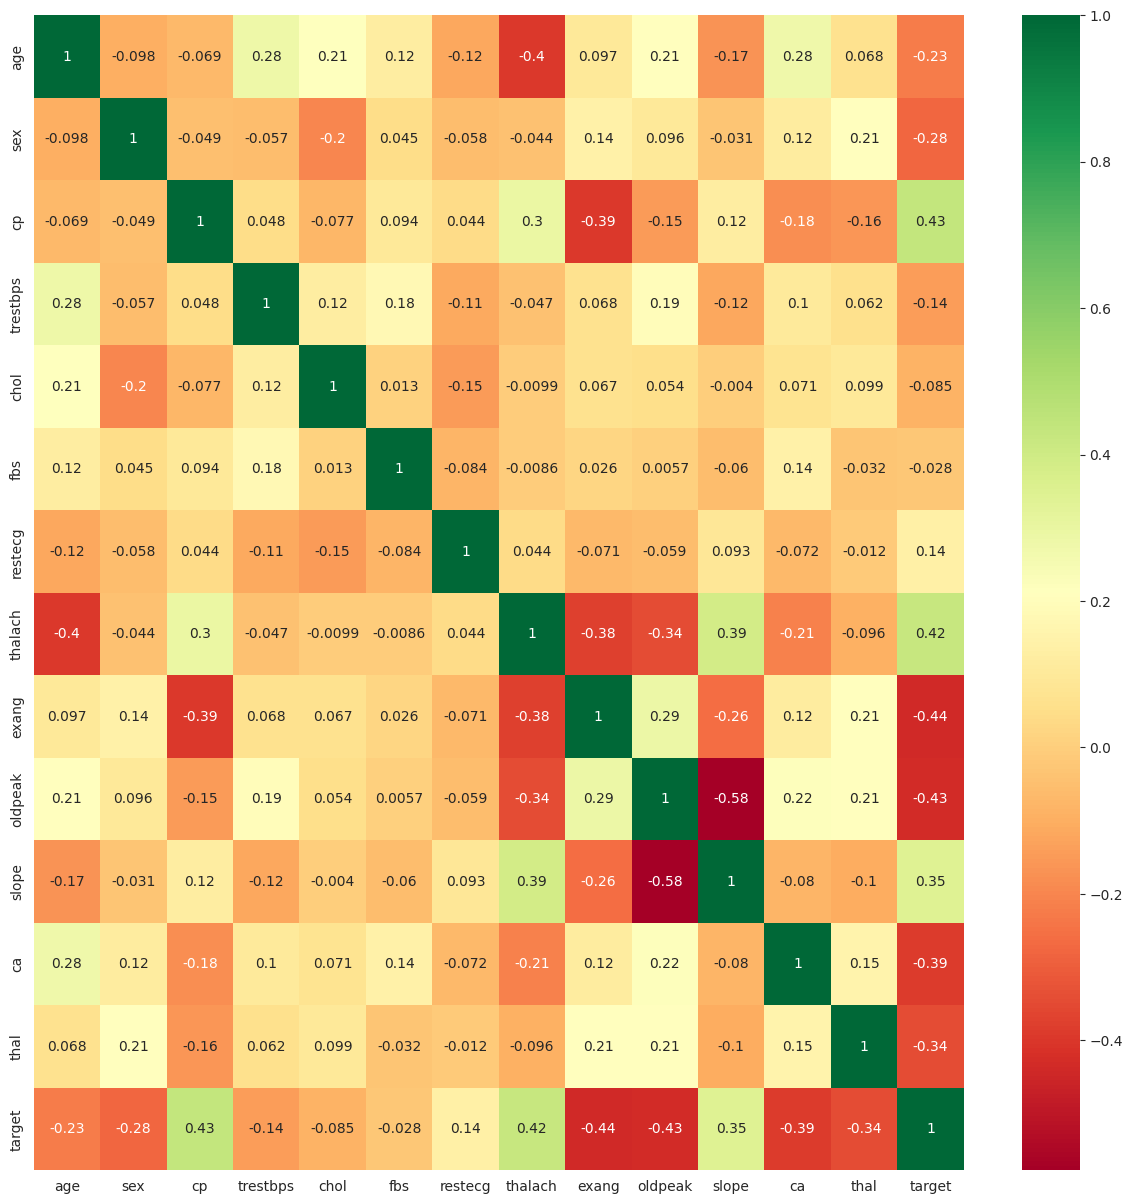

In [71]:
corrmat=heart_data.corr()  #calculate correaltion between colum and dataframe
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


<Axes: xlabel='target', ylabel='count'>

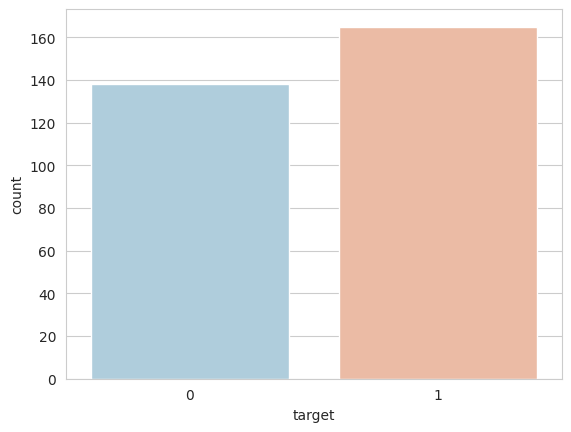

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data,palette='RdBu_r')

**Data Processing**

In [73]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[col_to_scale] = sc.fit_transform(heart_data[col_to_scale])
heart_data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
5,0.290464,1,0,0.478391,-1.048678,0,1,-0.072018,0,-0.551783,1,0,1,1


**Putting Feature Variable to X and Target variable to y**

In [74]:
X = heart_data.drop('target', axis=1)
y = heart_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# **Logistic Regression Model**

In [75]:
model1 = LogisticRegression(random_state=42) # get instance of model
model1.fit(X_train, y_train) # Train/Fit model  

y_pred1 = model1.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accur

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [77]:
confmat=confusion_matrix(y_test,y_pred1)
print(confmat)

[[32  9]
 [ 8 42]]


In [78]:
print(accuracy_score(y_test,y_pred1))

0.8131868131868132


# **KNN Model**

In [79]:
#Importing KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) #Fitting model on entire dataset X
y_pred2 = knn.predict(X_test) # Predicting
#For K = 1
print(accuracy_score(y_test, y_pred2))

0.7692307692307693


In [80]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
#For k=4
print(accuracy_score(y_test, y_pred3))

0.7912087912087912


In [81]:
KNeighborsClassifier(algorithm='auto', leaf_size=14, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2,weights='uniform')
# try K=1 through K=14 and record testing accuracy
k_range = list(range(1, 14))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred4 = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred4))

Text(0, 0.5, 'Testing Accuracy')

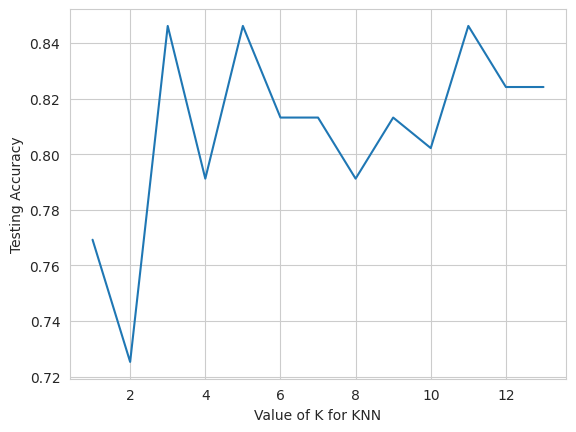

In [82]:
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred5 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred5))

0.8461538461538461


In [84]:
confmat=confusion_matrix(y_test,y_pred5)
print(confmat)
print(classification_report(y_test, y_pred5))

[[34  7]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



# **Decision Tree Model**

In [85]:
model2 = DecisionTreeClassifier(random_state=42) # get instance of model
model2.fit(X_train, y_train) # Train/Fit model 

y_pred6 = model2.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



In [86]:
print(accuracy_score(y_test,y_pred6))

0.7362637362637363


In [87]:
confmat=confusion_matrix(y_test,y_pred6)
print(confmat)

[[32  9]
 [15 35]]


In [88]:
mymodel3=DecisionTreeClassifier(criterion="entropy", max_depth=4)
mymodel3.fit(X_train,y_train)
y_pred7=mymodel3.predict(X_test)
print(classification_report(y_test, y_pred7)) # output accuracy

              precision    recall  f1-score   support

           0       0.65      0.83      0.73        41
           1       0.82      0.64      0.72        50

    accuracy                           0.73        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.75      0.73      0.72        91



In [89]:
print(accuracy_score(y_test,y_pred7))

0.7252747252747253


In [90]:
mymodel3=DecisionTreeClassifier(criterion="entropy", max_depth=6)
mymodel3.fit(X_train,y_train)
y_pred7=mymodel3.predict(X_test)
print(classification_report(y_test, y_pred7)) # output accuracy

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [ ]:
print(accuracy_score(y_test,y_pred7))

0.7142857142857143


In [92]:
mymodel3=DecisionTreeClassifier(criterion="entropy", max_depth=3)
mymodel3.fit(X_train,y_train)
y_pred7=mymodel3.predict(X_test)
print(classification_report(y_test, y_pred7)) # output accuracy

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [93]:
print(accuracy_score(y_test,y_pred7))

0.7692307692307693


In [94]:
confmat=confusion_matrix(y_test,y_pred7)
print(confmat)

[[32  9]
 [12 38]]


# **Building a Predictive System**

In [95]:
input_data = heart_data.iloc[1,0:13]

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
